Création d'un modèle de classification basé sur MLP.


In [1]:
#importation des library
%matplotlib inline
import matplotlib.pyplot as plt
import os
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn import datasets
import flask
from flask import Flask
print("done")

done


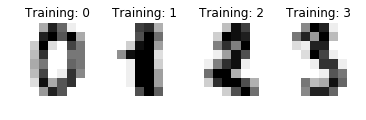

In [2]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [3]:
start=dt.datetime.now()
n_samples = len(digits.images)
#X,y = digits.data, digits.target
X,y = digits.images, digits.target
X = X.reshape(-1, 64)
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=0.25)
print('digits avec %d training - %d test samples' % (len(y_train), len(y_test)))
print('distribution du dataset:', np.bincount(y.astype('int64')))
#training
params = {'hidden_layer_sizes': [(256,), (512,), (128, 256, 128,)]}
mlp = MLPClassifier(verbose=10, learning_rate='adaptive')
clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print('Score best mean cross-validated:', clf.best_score_)
print('Meilleur parametre dans:', clf.best_params_)
joblib.dump(clf, 'model_MLP.pkl')
print("Modèle sauvegarder")
clf = clf.best_estimator_
print('Test accuracy:', clf.score(X_test, y_test))
print(dt.datetime.now() - start)

digits avec 1347 training - 450 test samples
('distribution du dataset:', array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.1min finished


Iteration 1, loss = 2.29916725
Iteration 2, loss = 2.27600261
Iteration 3, loss = 2.25554583
Iteration 4, loss = 2.23371173
Iteration 5, loss = 2.20908278
Iteration 6, loss = 2.18160849
Iteration 7, loss = 2.15090606
Iteration 8, loss = 2.11577719
Iteration 9, loss = 2.07669874
Iteration 10, loss = 2.03251125
Iteration 11, loss = 1.98427584
Iteration 12, loss = 1.93117720
Iteration 13, loss = 1.87382277
Iteration 14, loss = 1.81267462
Iteration 15, loss = 1.74874018
Iteration 16, loss = 1.68286676
Iteration 17, loss = 1.61557331
Iteration 18, loss = 1.54753910
Iteration 19, loss = 1.48095965
Iteration 20, loss = 1.41430220
Iteration 21, loss = 1.34905789
Iteration 22, loss = 1.28678374
Iteration 23, loss = 1.22650283
Iteration 24, loss = 1.16865583
Iteration 25, loss = 1.11382233
Iteration 26, loss = 1.06185058
Iteration 27, loss = 1.01326780
Iteration 28, loss = 0.96770951
Iteration 29, loss = 0.92349942
Iteration 30, loss = 0.88402728
Iteration 31, loss = 0.84579507
Iteration 32, los

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Modele testable par appel de webservice (API) via Flask
Etape 1 run Flask app dans un terminale prompt
    >python app.py
    
Etape 2
Une fois que app running, nous pouvons faire une requete pour une prediction
 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger pin code: 987-847-325

In [4]:
#Export testing sets to csv file
import pandas as pd

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test = X_test_df.to_csv('X_test.csv', sep=',',encoding='utf-8', index=False)
y_test = y_test_df.to_csv('y_test.csv', sep=',',encoding='utf-8', index=False)
print("done")

done


In [13]:
import pandas as pd
X_test_df = pd.read_csv('X_test.csv')
y_test_df = pd.read_csv('y_test.csv')
X_t = np.array(X_test_df)
y_t = np.array(y_test_df)
print("X_t", X_t.shape, X_t.size)
print("y_t", y_t.shape, y_t.size)

('X_t', (450L, 64L), 28800)
('y_t', (450L, 1L), 450)


In [14]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_t)
print("y_pred", y_pred.shape)
print (classification_report(y_t, y_pred))

('y_pred', (450L,))
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.92      0.92      0.92        48
          2       1.00      1.00      1.00        42
          3       0.98      1.00      0.99        44
          4       0.95      1.00      0.97        37
          5       1.00      0.98      0.99        46
          6       0.95      1.00      0.98        42
          7       1.00      0.98      0.99        53
          8       0.98      0.89      0.93        46
          9       0.96      1.00      0.98        55

avg / total       0.97      0.97      0.97       450

